<a href="https://colab.research.google.com/github/vedantrk/DAV-SEM6/blob/main/DAV_EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment - 3**

**Aim**: Multiple Linear Regression in Python

**Task to be performed** :
List the packages to be used for Simple Linear Regression in Python

Download the dataset from UCI Repository / Kaggle Dataset

-- Load data into Google Colab

-- Display the summary of the dataset

Check whether the data meets the assumptions

-- Normality : Check whether the dependent variable follows a normal distribution

-- Lineartiy : Check the relationship between the independent and dependent variable

Perform Linear Regression Analysis using the identified package

Visualize the results with a graph

Repeat the steps 2 to 5 using R libraries

Prepare a Colab Notebook with the Aim, Tasks performed, Program, Output, and Conclusion and upload the Notebook in your Github Repositiry.

Prepare a handwritten wrtieup with Aim, Theory and Conclusion.

**Program:**

In [ ]:
!pip install scikit-spatial

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
# from skspatial.objects import Plane, Points
# from skspatial.plotting import plot_3d

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df=df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
X = df[['wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','enginesize','horsepower', 'peakrpm']]
y = df['price']

<ipython-input-21-06df4803c272>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson',min_periods=1),annot=True,ax=ax)


<Axes: >

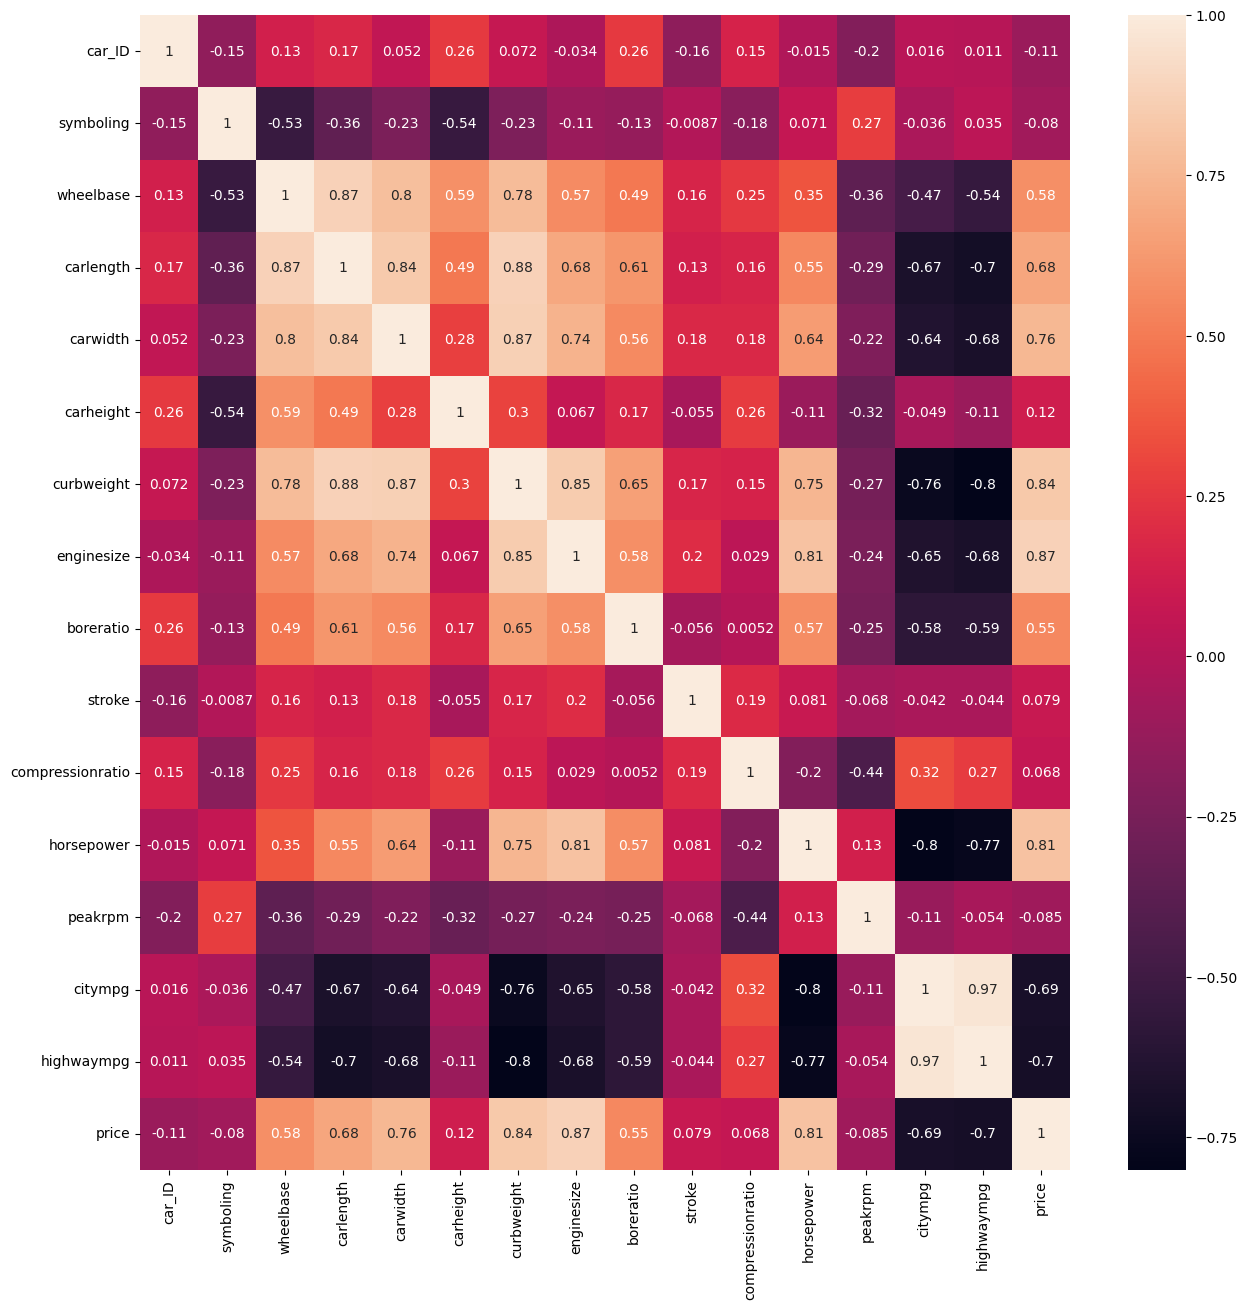

In [ ]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(method='pearson',min_periods=1),annot=True,ax=ax)

In [ ]:
X=df[['curbweight','enginesize','horsepower']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 15 to 146
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   curbweight  41 non-null     int64
 1   enginesize  41 non-null     int64
 2   horsepower  41 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [ ]:
r_squared = model.score(X_test, y_test)
intercept = model.intercept_
coefficients = model.coef_

print(f"Coefficient of Determination (R^2): {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Coefficient of Determination (R^2): 0.8208130980062113
Intercept: -13131.049540187065
Coefficients: [ 4.25875528 77.74024385 53.86481202]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([26675.83675306, 18673.27218441, 11226.32113258, 13520.42081085,
       23691.11924683,  6763.18184184,  8125.47500865,  7371.76748858,
       10783.43332747,  6839.77001664, 14699.30073444,  7644.32782622,
       15587.23862756, 11589.45815103, 37333.21655296,  5942.06311984,
         533.6441619 , 18871.87993969, 11335.67010545, 10293.67647078,
       11141.50463373, 22308.23360232,  6678.00673633,  4440.45977852,
        5999.04386711, 27314.6500444 , 15267.54763564, 16891.97691957,
        6801.51063932, 16372.40877595, 22690.31175707,  5905.35125105,
        7113.22082062, 20363.26834721,  9116.73524973, 22605.13665156,
       11933.36667203,  7886.95109964,  5766.07306912, 19267.94418032,
        9434.36096271])

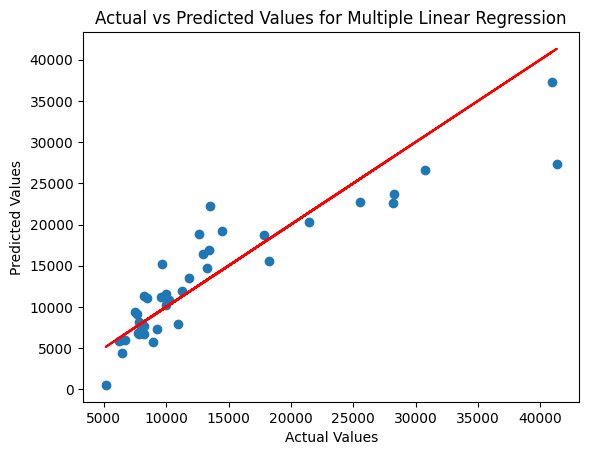

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test,color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Multiple Linear Regression")
plt.show()

In [ ]:
! pip install scikit-spatial

In [ ]:
from skspatial.objects import Plane, Points
from skspatial.plotting import plot_3d

In [ ]:
X_test

,curbweight,enginesize,horsepower
15,3230,209,182
9,3053,131,160
100,2302,120,97
132,2658,121,110
68,3750,183,123
95,2028,97,69
159,2275,110,56
162,2140,98,70
147,2455,108,94
182,2261,97,52


In [ ]:
l=[[X_test['enginesize'].iloc[i],X_test['horsepower'].iloc[i], y_pred[i]] for i in range(40)]

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

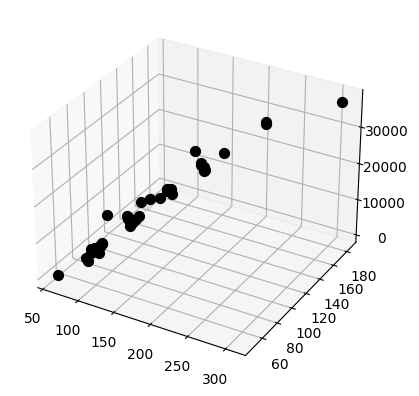

In [ ]:
points = Points(l)
plane = Plane.best_fit(points)

plot_3d(
    points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)

In [ ]:
points = Points([[X_test['Hours Studied'].iloc[i], X_test['Previous Scores'].iloc[i], y_pred[i][0]] for i in range(30)])
plane = Plane.best_fit(points)

plot_3d(
    points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)

https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data?resource=download

R


In [ ]:
my_data <- read.csv("/content/Dummy Data HSS.csv")
my_data <- na.omit(my_data)
head(my_data)

,TV,Radio,Social.Media,Influencer,Sales
,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,16,6.566231,2.907983,Mega,54.73276
2,13,9.237765,2.409567,Mega,46.67790
3,41,15.886446,2.913410,Mega,150.17783
4,83,30.020028,6.922304,Mega,298.24634
5,15,8.437408,1.405998,Micro,56.59418
6,29,9.614382,1.027163,Mega,105.88915


In [ ]:
model <- lm(Sales ~ TV + Radio, data = my_data)

summary(model)


Call:
lm(formula = Sales ~ TV + Radio, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6178  -2.0018  -0.0075   2.0231  11.2751 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.129985   0.100857   -1.289    0.198    
TV           3.562571   0.003389 1051.231   <2e-16 ***
Radio       -0.003284   0.009155   -0.359    0.720    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 4543 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 2.258e+06 on 2 and 4543 DF,  p-value: < 2.2e-16


In [ ]:
predictions <- predict(model, newdata = my_data)

mse <- mean((my_data$Sales - predictions)^2)

rmse <- sqrt(mse)

cat("Mean Squared Error:", mse, "\n")
cat("Root Mean Squared Error:", rmse, "\n")

Mean Squared Error: 8.693935 
Root Mean Squared Error: 2.948548 


In [ ]:
coefficients <- coef(model)

cat("Intercept:", coefficients[1], "\n")
cat("TV Coefficient:", coefficients[2], "\n")
cat("Radio Coefficient:", coefficients[3], "\n")

Intercept: -0.1299848 
TV Coefficient: 3.562571 
Radio Coefficient: -0.003284394 


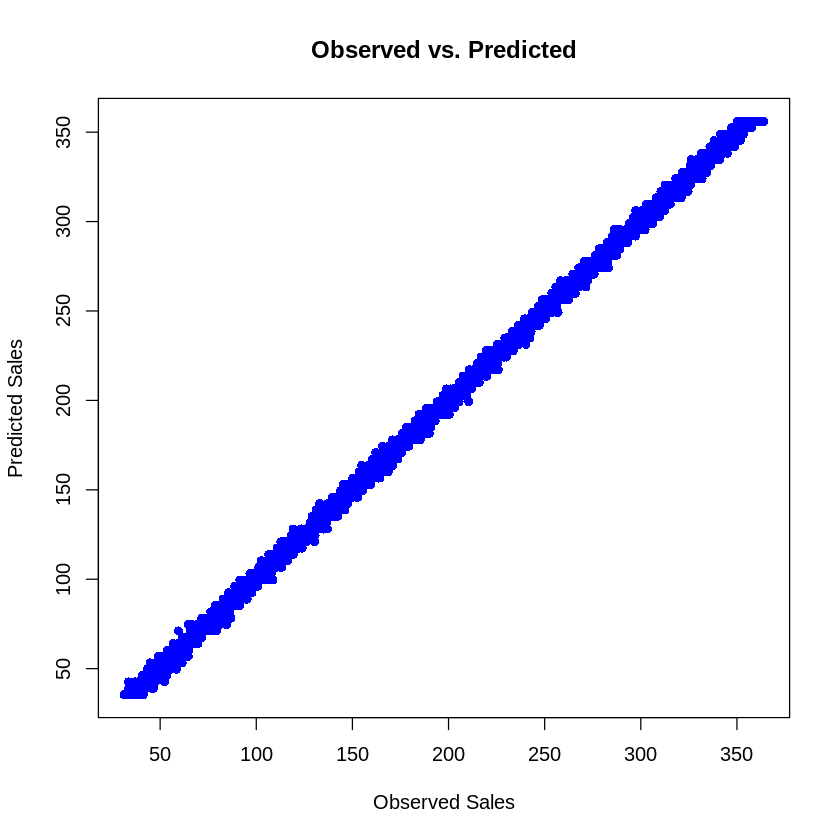

In [ ]:
plot(my_data$Sales, predictions, main = "Observed vs. Predicted", xlab = "Observed Sales", ylab = "Predicted Sales", col = "blue", pch = 16)

**Conclusion :**

Understood the concept of Simple Linear Regression
Explored the packages in Python and R
Performed Simple Linear Regression using the Libraries in Python and R